In [114]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [115]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from datetime import date
from sklearn.preprocessing import OneHotEncoder

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


<b> Problem Statement 01 :</b> You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

# 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.


***
<h1><div style="text-align: Left">Analysis and Solutions</div></h1>


<h2>Acquire data</h2>

In [116]:
print(color.BOLD+color.PURPLE+'Preview of the sample data obtained from the .csv file :')
#Reading train and test data 

df1=pd.read_excel('Election_Data.xlsx','Election_Dataset_Two Classes')
df1.head()

Preview of the sample data obtained from the .csv file :


Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0  1           Labour  43   3                       3                         
1  2           Labour  36   4                       4                         
2  3           Labour  35   4                       4                         
3  4           Labour  24   4                       2                         
4  5           Labour  41   2                       2                         

   Blair  Hague  Europe  political.knowledge  gender  
0  4      1      2       2                    female  
1  4      4      5       2                    male    
2  5      2      3       2                    male    
3  2      1      4       0                    female  
4  1      1      6       2                    male

<h2> Data Inspection </h2>

In [117]:
print(color.BOLD+color.PURPLE+'Dataset has',df1.shape[0],'rows and',df1.shape[1],'columns.')

Dataset has 1525 rows and 10 columns.


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [119]:
cat=[]
num=[]
for column in df1.columns:
    if df1[column].dtype == 'object':
        cat.append(column)
    else:
        num.append(column)

print(color.BOLD+color.PURPLE+'Categorical features in DataSet',cat)
print("\n")
print(color.BOLD+color.PURPLE+'Numberical features in DataSet',num)

Categorical features in DataSet ['vote', 'gender']


Numberical features in DataSet ['Unnamed: 0', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [120]:
df1.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [121]:
print(color.BOLD+color.PURPLE+'There are no null values in the dataset.')

There are no null values in the dataset.


In [122]:
df1[df1.isin([np.nan, np.inf, -np.inf]).any(1)].sum()

Unnamed: 0                 0.0
vote                       0.0
age                        0.0
economic.cond.national     0.0
economic.cond.household    0.0
Blair                      0.0
Hague                      0.0
Europe                     0.0
political.knowledge        0.0
gender                     0.0
dtype: float64

In [123]:
print(color.BOLD+color.PURPLE+'There are no nan or infinite values in the dataset.')

There are no nan or infinite values in the dataset.


In [124]:
duplicateRowsDF = df1[df1.duplicated()]
duplicateRowsDF.sum()

Unnamed: 0                 0.0
vote                       0.0
age                        0.0
economic.cond.national     0.0
economic.cond.household    0.0
Blair                      0.0
Hague                      0.0
Europe                     0.0
political.knowledge        0.0
gender                     0.0
dtype: float64

In [126]:
print(color.BOLD+color.PURPLE,"There are no duplicate values in the dataset.")

 There are no duplicate values in the dataset.


<h2> Reading unique values in non-numeric columns </h2>

In [127]:
#Reading unique values in non-numeric columns
print(color.BOLD+color.PURPLE+"Unique values in categorical features of dataset :\n")
for column in df1.columns:
    if df1[column].dtype == 'object':
        
        print(color.BOLD+color.DARKCYAN,df1[column].value_counts().sort_values())
        print('\n')

Unique values in categorical features of dataset :

 Conservative    462 
Labour          1063
Name: vote, dtype: int64


 male      713
female    812
Name: gender, dtype: int64




In [128]:
#Summary of dataset
print(color.BOLD+color.PURPLE+"Statistical summary of features in dataset :\n")

df1.describe(include="all").T

Statistical summary of features in dataset :



count unique     top  freq        mean         std  \
Unnamed: 0               1525.0  NaN    NaN     NaN   763.000000  440.373894   
vote                     1525    2      Labour  1063  NaN         NaN          
age                      1525.0  NaN    NaN     NaN   54.182295   15.711209    
economic.cond.national   1525.0  NaN    NaN     NaN   3.245902    0.880969     
economic.cond.household  1525.0  NaN    NaN     NaN   3.140328    0.929951     
Blair                    1525.0  NaN    NaN     NaN   3.334426    1.174824     
Hague                    1525.0  NaN    NaN     NaN   2.746885    1.230703     
Europe                   1525.0  NaN    NaN     NaN   6.728525    3.297538     
political.knowledge      1525.0  NaN    NaN     NaN   1.542295    1.083315     
gender                   1525    2      female  812   NaN         NaN          

                          min    25%    50%     75%     max  
Unnamed: 0               1.0   382.0  763.0  1144.0  1525.0  
vote                     NaN   NaN    NaN    NaN     NaN     
age                      24.0  41.0   53.0   67.0    93.0    
economic.cond.national   1.0   3.0    3.0    4.0     5.0     
economic.cond.household  1.0   3.0    3.0    4.0     5.0     
Blair                    1.0   2.0    4.0    4.0     5.0     
Hague                    1.0   2.0    2.0    4.0     5.0     
Europe                   1.0   4.0    6.0    10.0    11.0    
political.knowledge      0.0   0.0    2.0    2.0     3.0     
gender                   NaN   NaN    NaN    NaN     NaN

## Observations

Dataset contains data of a survey on <b>1525 voters and 10 features</b> out of which <b>gender and vote</b> are categorical data types while other variables are numeric type.
There are no null, 'nan',infinite or duplicate values in the dataset.

The proportion of feature <b>gender is 812 females and 713 males.</b>
and proportion for feature <b>vote is 1063 Labour voters and 462 conservative voters.</b>



# 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

<h2> Univariate Analysis </h2>

In [129]:
print(color.BOLD+color.PURPLE+'Univariate analysis of features in a data set :')

Univariate analysis of features in a data set :


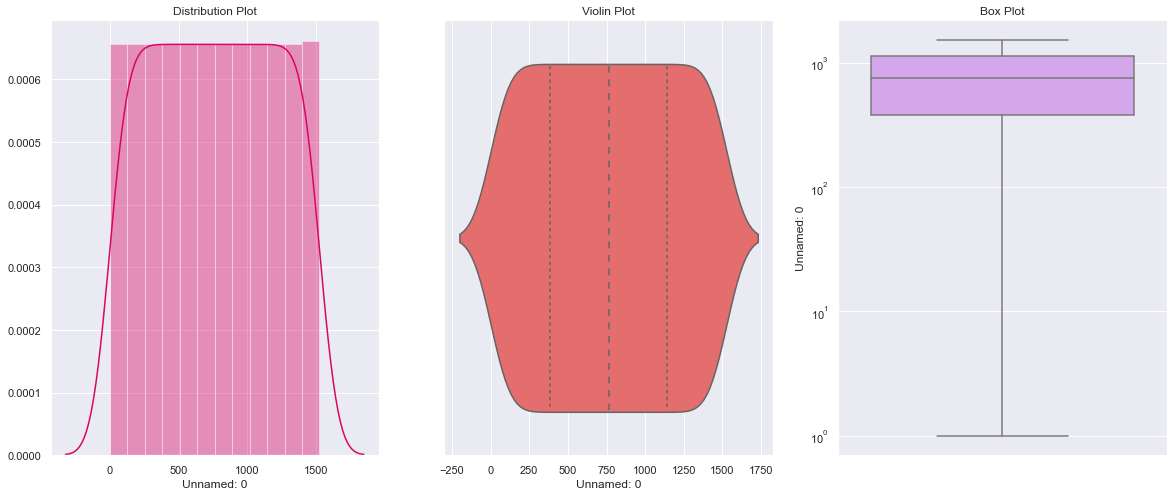

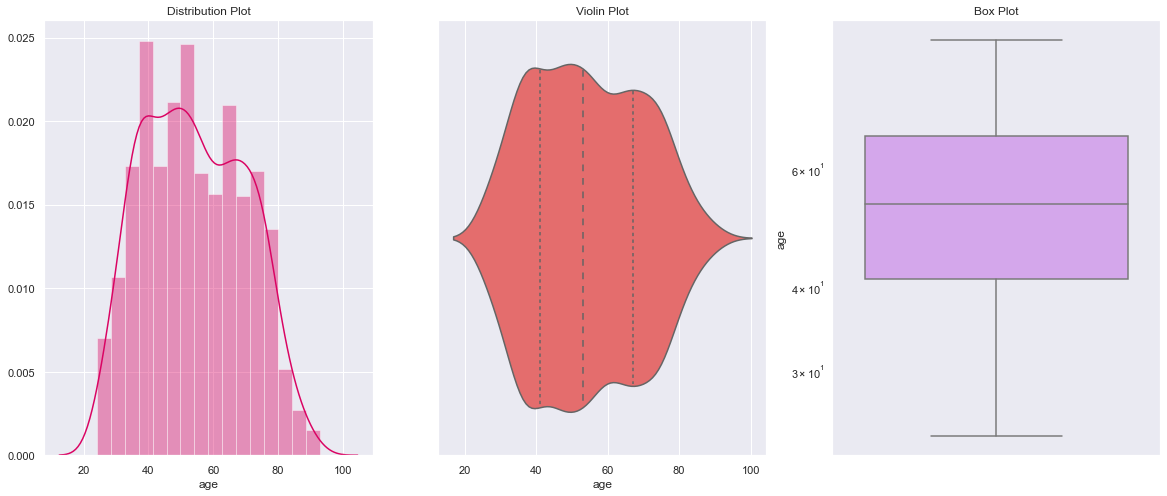

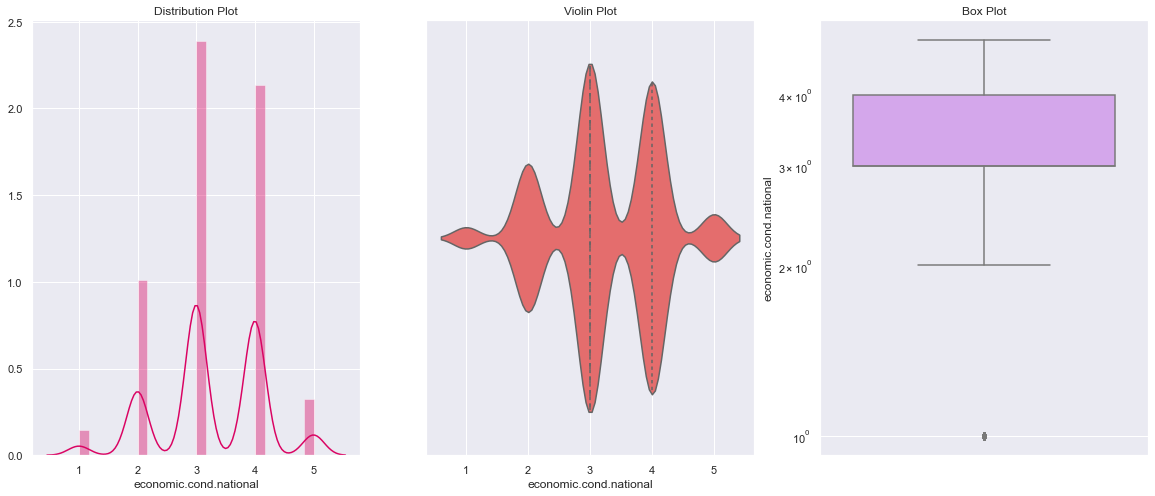

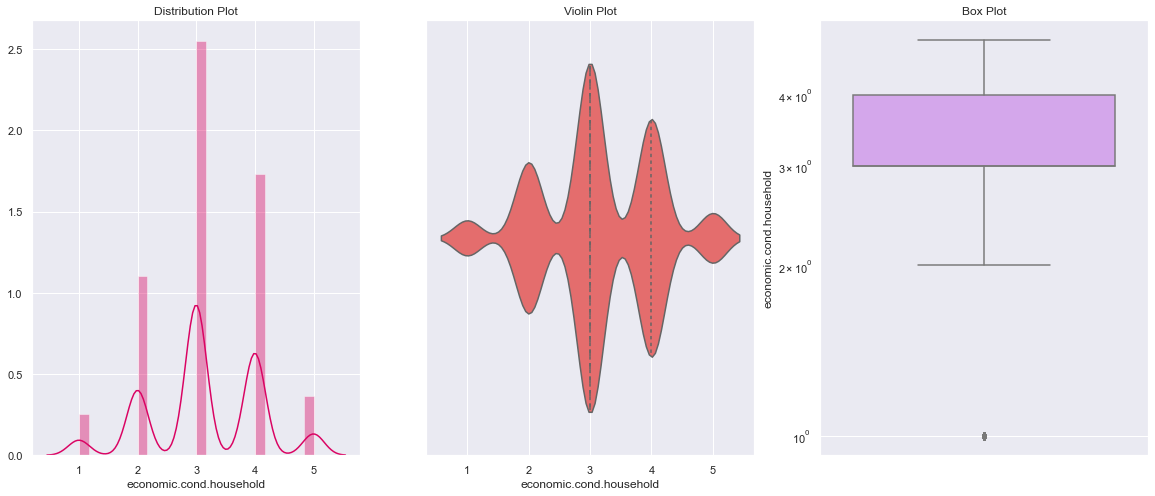

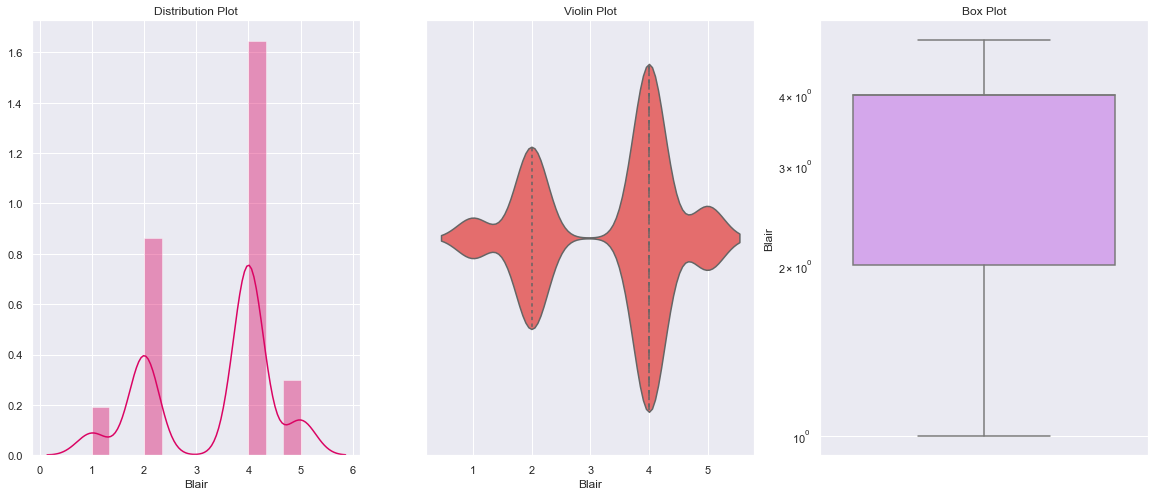

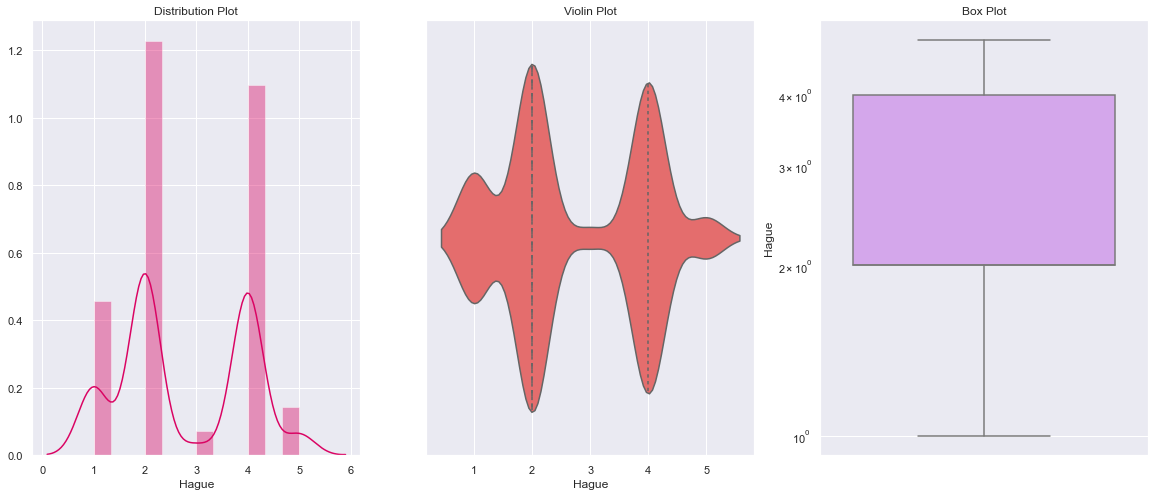

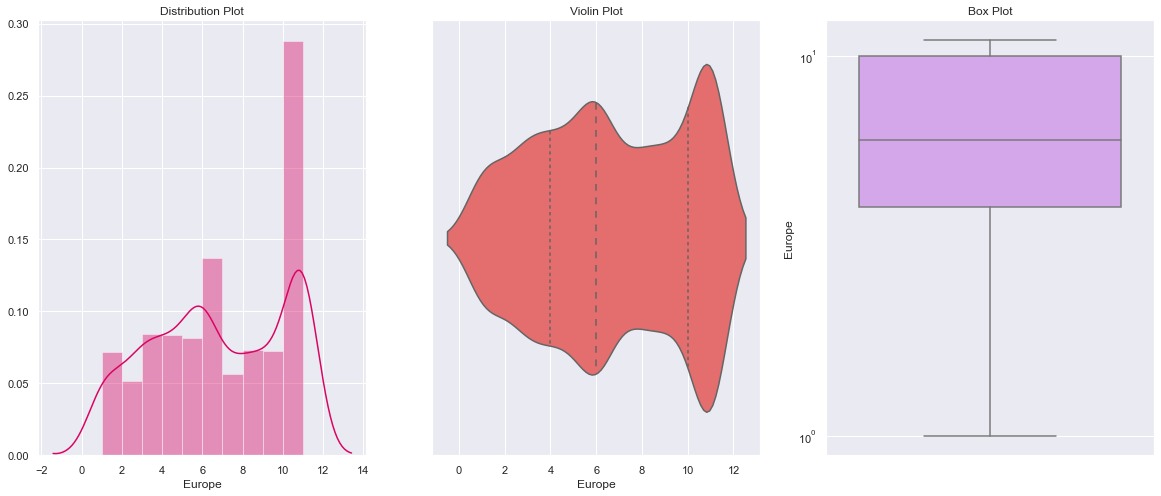

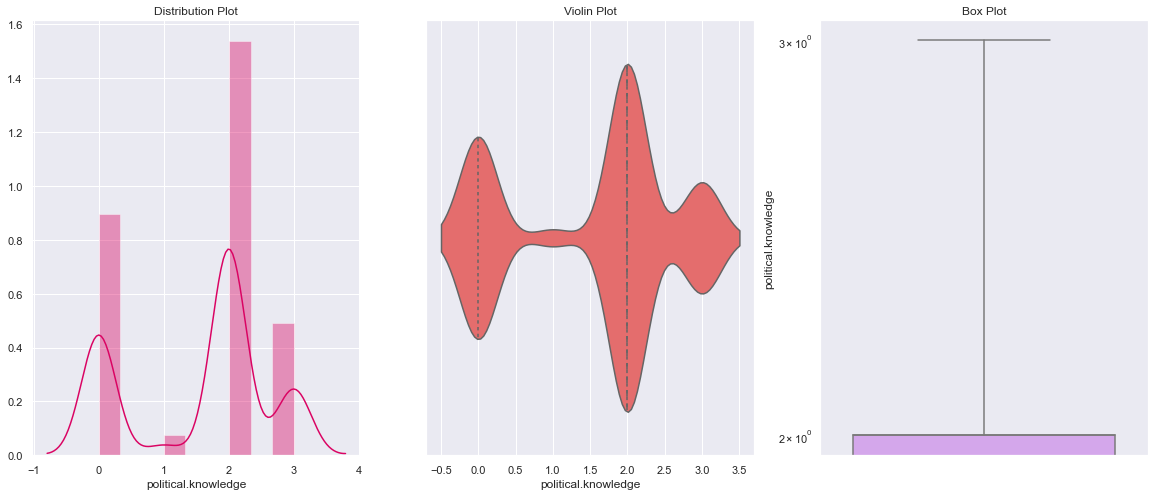

In [130]:
def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df1[col],ax=ax[0], color="#da0463")
        plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df1, x=col,ax=ax[1], inner="quartile", color="#f85959")
        plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df1, x=col,ax=ax[2],orient='v', color="#d89cf6")
        plt.yscale('log')
plt.show()

for column in df1.columns:
    if df1[column].dtype != 'object':
        
        uni(df1,column,0)

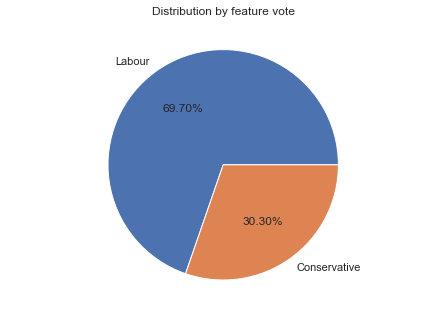

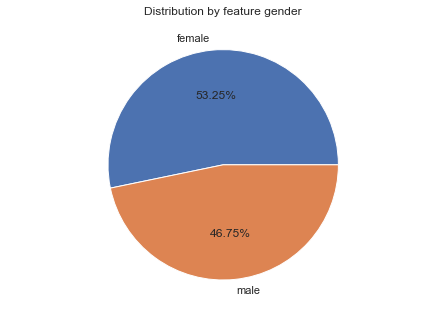

In [131]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
cut = df1['vote'].value_counts()
labels=cut.index
ax.pie(cut,labels=labels,autopct='%1.2f%%')
plt.title('Distribution by feature vote')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
cut = df1['gender'].value_counts()
labels=cut.index
ax.pie(cut,labels=labels,autopct='%1.2f%%')
plt.title('Distribution by feature gender')
plt.show()


<h2> Observations: </h2>

Amongst all feature, 'age' is normally distributed.

<br><br>Proportion of Conservative voters is higher than Labour than Male voters.
<br>Conservative voters are 30.30% while Labour voters are 69.70%

<br><br>Proportion of Female voters is slightly greater than Male voters.
<br>Female voters are 53.25% while male voters are 46.75%

<h2> Bivariate Analysis </h2>

Bivariate analysis :


<AxesSubplot:xlabel='vote', ylabel='economic.cond.household'>

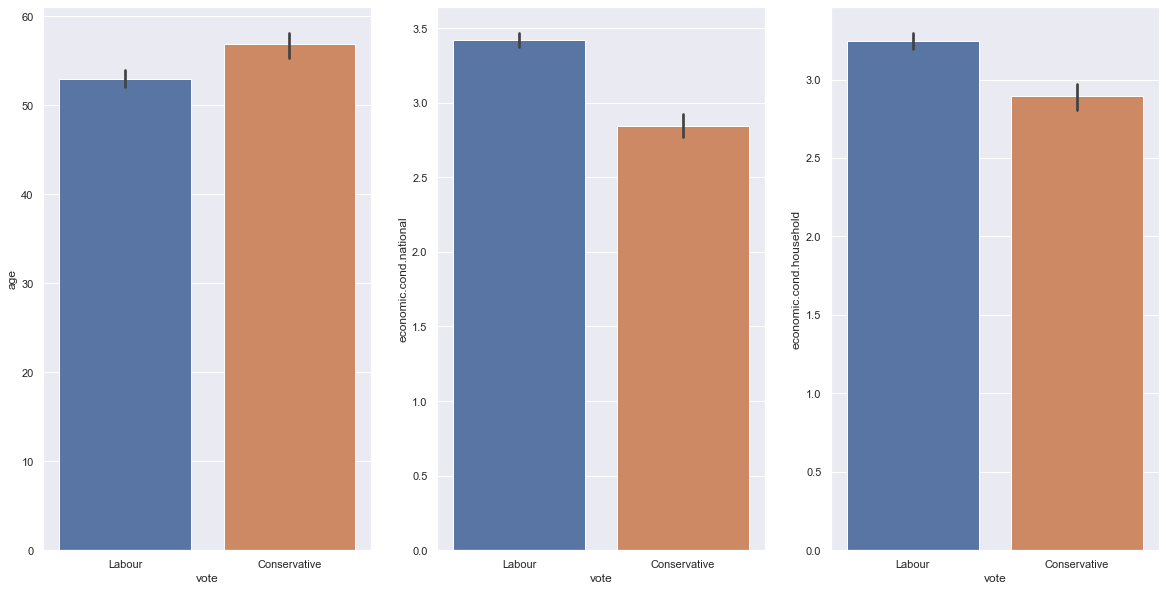

In [132]:
print(color.BOLD+color.PURPLE+'Bivariate analysis :')

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
result = df1.groupby(['vote'])['age'].aggregate(np.median).reset_index().sort_values('age')
sns.barplot(x='vote', y="age", data=df1)

plt.subplot(1,3,2)
result = df1.groupby(['vote'])['economic.cond.national'].aggregate(np.median).reset_index().sort_values('economic.cond.national')
sns.barplot(x='vote', y="economic.cond.national", data=df1)

plt.subplot(1,3,3)
result = df1.groupby(['vote'])['economic.cond.household'].aggregate(np.median).reset_index().sort_values('economic.cond.household')
sns.barplot(x='vote', y="economic.cond.household", data=df1)

<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

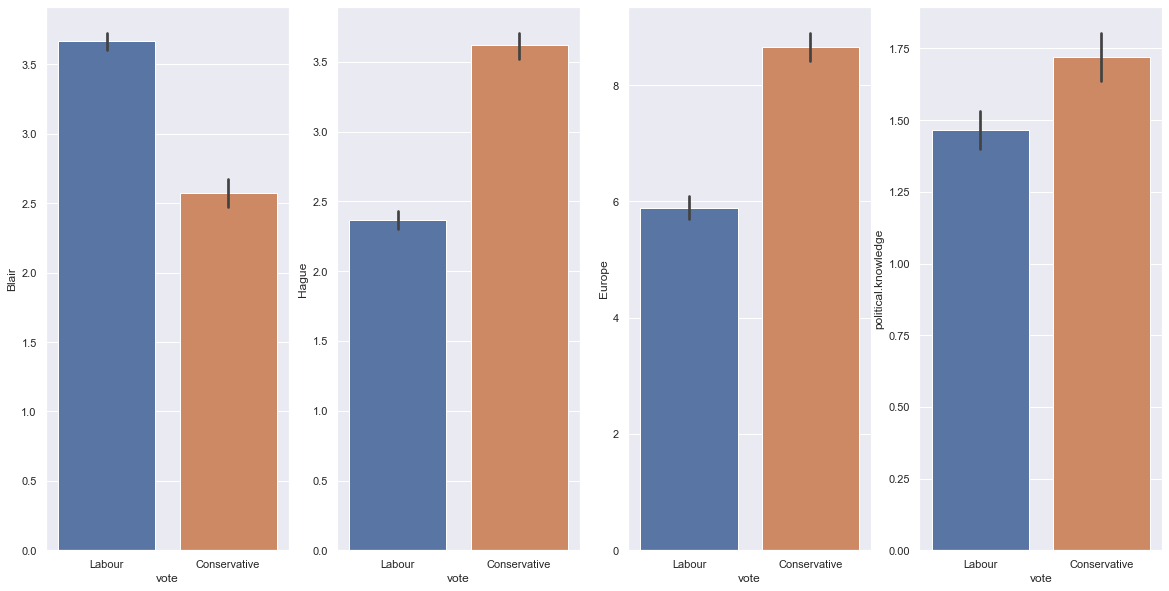

In [133]:
plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
result = df1.groupby(['vote'])['Blair'].aggregate(np.median).reset_index().sort_values('Blair')
sns.barplot(x='vote', y="Blair", data=df1)

plt.subplot(1,4,2)
result = df1.groupby(['vote'])['Hague'].aggregate(np.median).reset_index().sort_values('Hague')
sns.barplot(x='vote', y="Hague", data=df1)

plt.subplot(1,4,3)
result = df1.groupby(['vote'])['Europe'].aggregate(np.median).reset_index().sort_values('Europe')
sns.barplot(x='vote', y="Europe", data=df1)

plt.subplot(1,4,4)
result = df1.groupby(['vote'])['political.knowledge'].aggregate(np.median).reset_index().sort_values('political.knowledge')
sns.barplot(x='vote', y="political.knowledge", data=df1)

<h2> Checking correlations in data </h2>

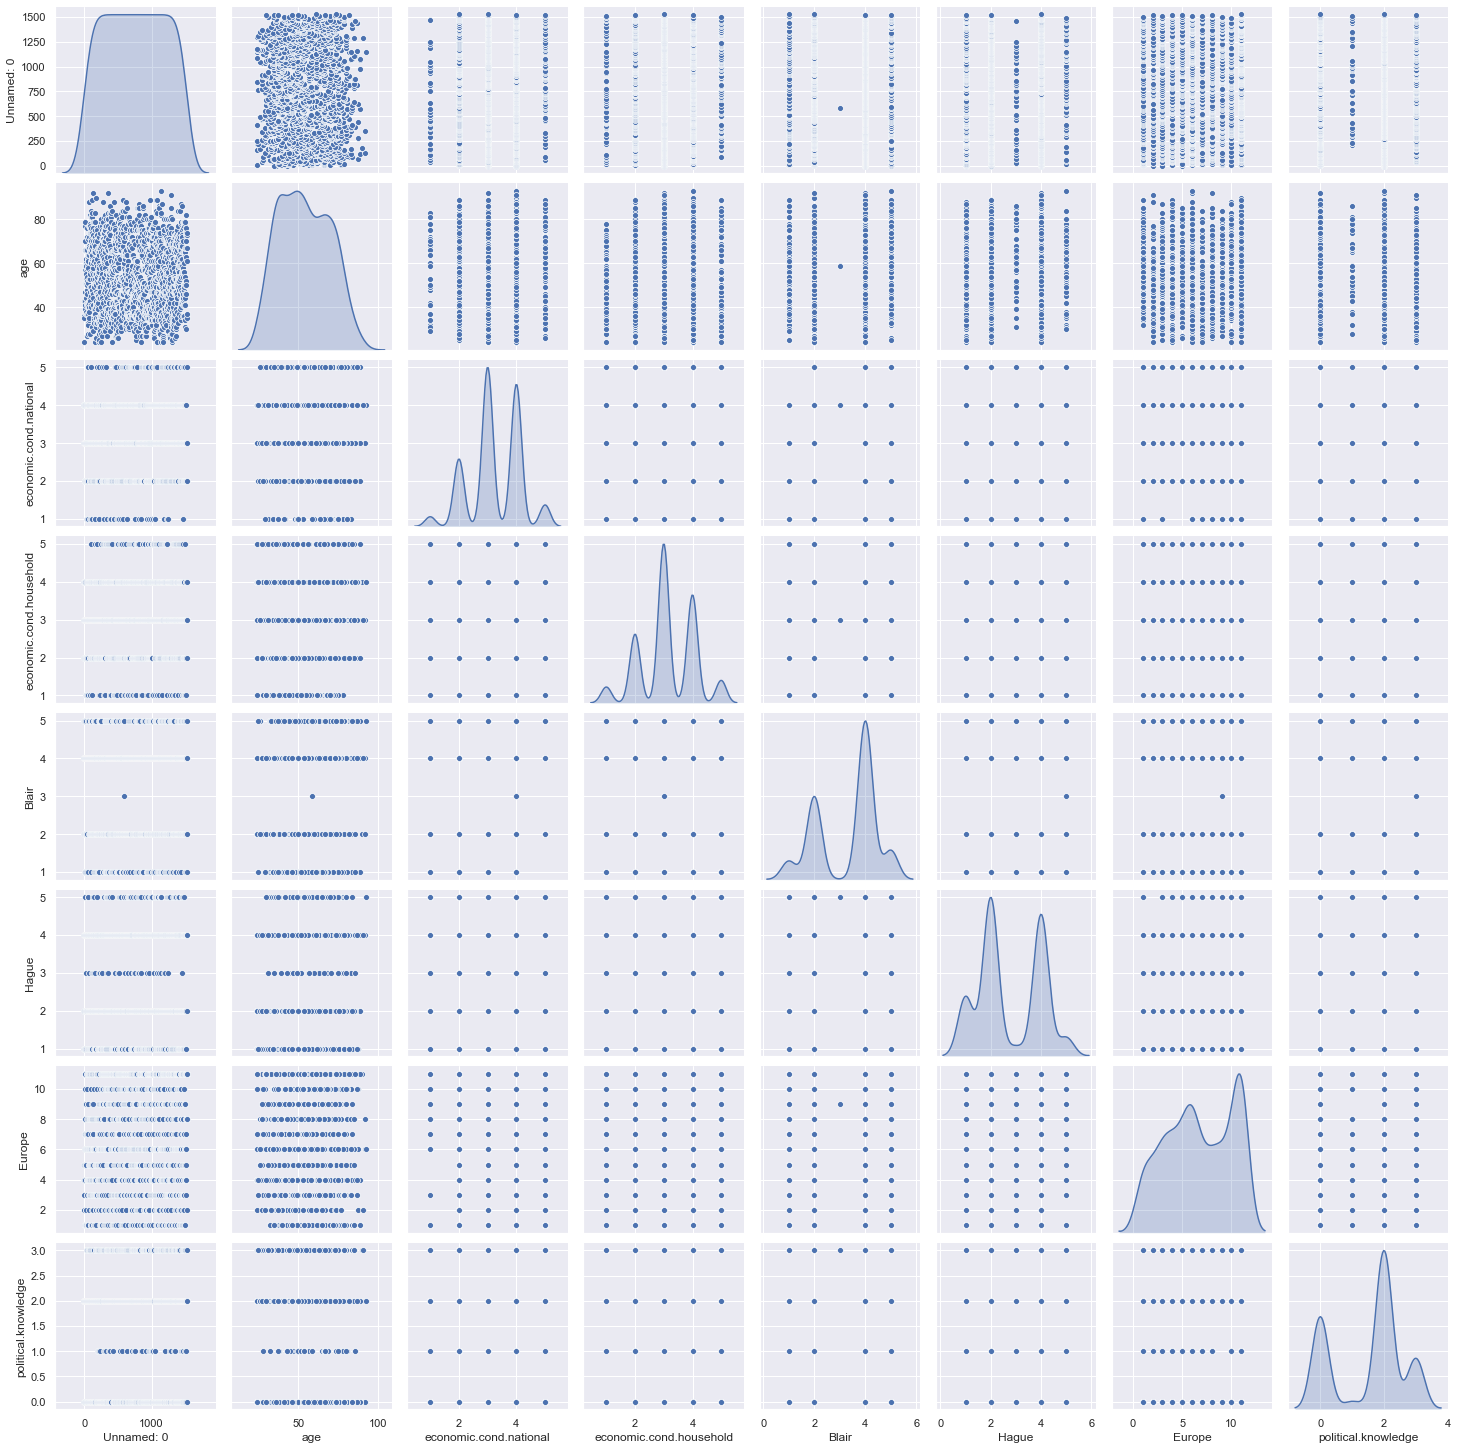

In [70]:
sns.pairplot(df1,diag_kind="kde")
plt.show()

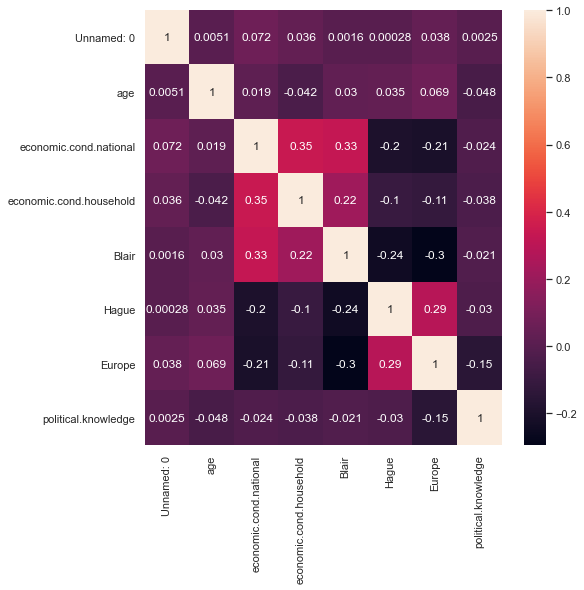

In [71]:
plt.figure(figsize = (8, 8))
sns.heatmap(df1.corr(), annot = True)
plt.show()

<h2> Observations: </h2>
<br><b> There is no problem of multicolinearity in data. </b>

<h2> Checking Outliers in Data </h2>

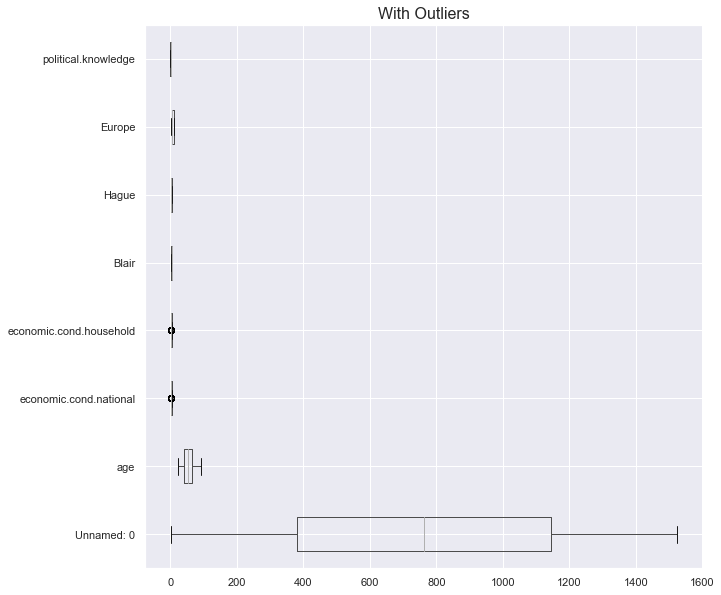

In [134]:
# construct box plot for continuous variables
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=False)
plt.title('With Outliers',fontsize=16)
plt.show()

In [135]:
print(color.BOLD+color.PURPLE+"There are no outlier in the data.")


There are no outlier in the data.


<h2>Categorical features in data set, encoded:</h2>

In [136]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print(color.BOLD+color.DARKCYAN+'Feature:',feature)
        print(color.BOLD+color.DARKCYAN,pd.Categorical(df1[feature].unique()))
        print(color.BOLD+color.DARKCYAN,pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



Feature: vote
 ['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
 [1 0]


Feature: gender
 ['female', 'male']
Categories (2, object): ['female', 'male']
 [0 1]


<h2> Post encodeding features and removing unwanted column 'Unnamed: 0', data set looks like : </h2>

In [137]:
#Remove the original/unwanted variable
df1.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


<b> The data set is cleaned for anolmolies and now ready to be utlised for model building.</b>

# 3. Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 3 pts), Data Split: Split the data into train and test (70:30) 

<h2> Model Building </h2>

In [139]:
# Copy all the predictor variables into X dataframe
X = df1.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df1['vote']

In [140]:
# Split X and y into training and test set in 75:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [141]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',X_test.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (1067, 8)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 8)
Number of rows and columns of the test set for the dependent variable: (458,)


# 4. Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models

<h1>Logistic Regression Model </h1>

In [142]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [143]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [144]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [145]:
print(color.BOLD+color.PURPLE+'Best Features obtained with grid search method for Logistic Regression model :','\n')
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

Best Features obtained with grid search method for Logistic Regression model : 

{'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=1e-05)


In [146]:
print(color.BOLD+color.PURPLE+"Fitting the Logistic Regression model using the best features obtained:")
Logmodel = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True,n_jobs=2,tol=0.0001)
print(Logmodel.fit(X_train, y_train))

Fitting the Logistic Regression model using the best features obtained:


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


In [147]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = Logmodel.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = Logmodel.predict(X_test)


## Model Evaluation

Plotting confusion matrix for the different models for the Training and Testing Data:


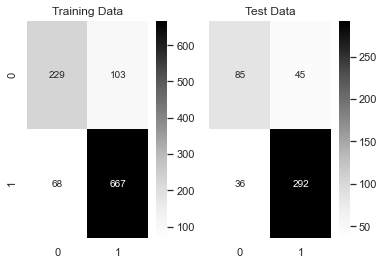

In [53]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

print(color.BOLD+color.PURPLE+"Plotting confusion matrix for the different models for the Training and Testing Data:")

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


<b>Evaluating model performance on the training data :</b>

In [148]:
LogReg_metric=metrics.classification_report(y_train,pred_class_train,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print("\n")
df=pd.DataFrame(LogReg_metric).transpose()
Log_train_precision=round(df.loc["1"][0],2)
Log_train_recall=round(df.loc["1"][1],2)
Log_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Logistic Train data metrices:\n')
print ('Logistic Regression Train Precision',Log_train_precision)
print ('Logistic Regression Train Recall ',Log_train_recall)
print ('Logistic Regression Train F1 score ',Log_train_f1)
#Train Data Accuracy
Log_train_acc=Logmodel.score(X_train,y_train) 
print ('Logistic Regression Train Data Accuracy ',Log_train_acc)



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



Logistic Train data metrices:

Logistic Regression Train Precision 0.87
Logistic Regression Train Recall  0.91
Logistic Regression Train F1 score  0.89
Logistic Regression Train Data Accuracy  0.8397375820056232


In [149]:
LogReg_metric=metrics.classification_report(y_test,pred_class_test,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the testing data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')
print("\n")
df=pd.DataFrame(LogReg_metric).transpose()
Log_test_precision=round(df.loc["1"][0],2)
Log_test_recall=round(df.loc["1"][1],2)
Log_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Logistic Regression Test data metrices:\n')
print ('Logistic Regression Test Precision',Log_test_precision)
print ('Logistic Regression Test Recall ',Log_test_recall)
print ('Logistic Regression Test F1 score ',Log_test_f1)
Log_test_acc=Logmodel.score(X_test,y_test) 
print ('Logistic Regression Test Data Accuracy',Log_test_acc)


Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



Logistic Regression Test data metrices:

Logistic Regression Test Precision 0.87
Logistic Regression Test Recall  0.89
Logistic Regression Test F1 score  0.88
Logistic Regression Test Data Accuracy 0.8231441048034934


In [150]:
print(color.BOLD+color.PURPLE+"Training Data Probability Prediction:")
pred_prob_train = Logmodel.predict_proba(X_train)
print(pred_prob_train[:,1])
print("\n")
print(color.BOLD+color.PURPLE+"Test Data Probability Prediction:")
pred_prob_test = Logmodel.predict_proba(X_test)
print(pred_prob_test[:,1])

Training Data Probability Prediction:
[0.38509607 0.81252391 0.80983657 ... 0.76653923 0.93420808 0.59116289]


Test Data Probability Prediction:
[0.0679934  0.31161284 0.66637514 0.52357609 0.84048038 0.06338433
 0.99071502 0.98171605 0.85889401 0.95859458 0.90190537 0.63239326
 0.94569487 0.97222146 0.87968853 0.89764992 0.95598452 0.7588331
 0.95099133 0.83694771 0.88760589 0.20441759 0.71709858 0.93661642
 0.72330697 0.79897713 0.03906808 0.11697598 0.87924013 0.8631075
 0.85076357 0.37214311 0.46500363 0.94539141 0.43857071 0.60137762
 0.99329553 0.04719738 0.97762459 0.98845192 0.15124856 0.89365246
 0.35353076 0.29430921 0.3501496  0.97666739 0.85034417 0.97952318
 0.99136388 0.12104063 0.6487937  0.93007201 0.46903252 0.92609368
 0.0406047  0.89153099 0.90032622 0.92374651 0.7467943  0.94566217
 0.57997757 0.71080505 0.93538619 0.8183489  0.17232192 0.51241217
 0.91604106 0.94446026 0.9630885  0.98171605 0.98287379 0.08772645
 0.75458223 0.97449542 0.2662781  0.09458906 0.99324

AUC and ROC for the training data :
AUC for the Training Data: 0.889


AUC and ROC for the test data :
AUC for the Test Data: 0.882


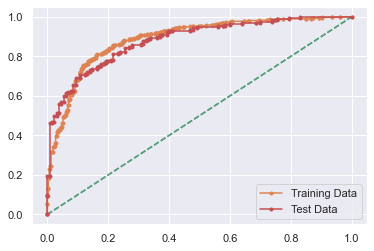

In [151]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the training data :")

# calculate AUC
Log_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % Log_train_auc)

#  calculate roc curve
logtrainfpr, logtraintpr, logtrainthresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logtrainfpr, logtraintpr, marker='.',label = 'Training Data')

print("\n")
print(color.BOLD+color.PURPLE+"AUC and ROC for the test data :")

# calculate AUC
Log_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % Log_test_auc)

#  calculate roc curve
logtestfpr, logtesttpr, logtestthresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logtestfpr, logtesttpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<h1> LDA model </h1>

In [152]:
print(color.BOLD+color.PURPLE+"Fitting the LDA model to dataset:")
clf = LinearDiscriminantAnalysis()
LDAmodel=clf.fit(X_train,y_train)
LDAmodel

Fitting the LDA model to dataset:


LinearDiscriminantAnalysis()

In [153]:
# Training Data Class Prediction with a cut-off value of 0.5
LDApred_class_train = LDAmodel.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
LDApred_class_test = LDAmodel.predict(X_test)


## Model Evaluation

Plotting confusion matrix for the different models for the Training and Test Data:


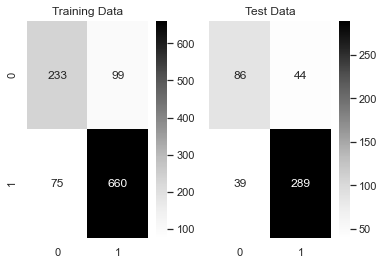

In [154]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

print(color.BOLD+color.PURPLE+"Plotting confusion matrix for the different models for the Training and Test Data:")

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,LDApred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,LDApred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


<b>Evaluating model performance on the training data :</b>

In [155]:
LDA_metric=metrics.classification_report(y_train,LDApred_class_train,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the training data:\n\n',metrics.classification_report(y_train,LDApred_class_train),'\n')
print("\n")
df=pd.DataFrame(LDA_metric).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'LDA Train data metrices:\n')
print ('LDA Regression Train Precision',LDA_train_precision)
print ('LDA Regression Train Recall ',LDA_train_recall)
print ('LDA Regression Train F1 score ',LDA_train_f1)
#Train Data Accuracy
LDA_train_acc=LDAmodel.score(X_train,y_train) 
print ('LDA Train Data Accuracy ',LDA_train_acc)



Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 



LDA Train data metrices:

LDA Regression Train Precision 0.87
LDA Regression Train Recall  0.9
LDA Regression Train F1 score  0.88
LDA Train Data Accuracy  0.8369259606373008


In [156]:
LDA_metric=metrics.classification_report(y_test,LDApred_class_test,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the testing data:\n\n',metrics.classification_report(y_test,LDApred_class_test),'\n')
print("\n")
df=pd.DataFrame(LDA_metric).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'LDA Test data metrices:\n')
print ('LDA Regression Test Precision',LDA_test_precision)
print ('LDA Regression Test Recall ',LDA_test_recall)
print ('LDA Regression Test F1 score ',LDA_test_f1)
#test Data Accuracy
LDA_test_acc=LDAmodel.score(X_test,y_test) 
print ('LDA test Data Accuracy ',LDA_test_acc)



Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



LDA Test data metrices:

LDA Regression Test Precision 0.87
LDA Regression Test Recall  0.88
LDA Regression Test F1 score  0.87
LDA test Data Accuracy  0.8187772925764192


In [157]:
print(color.BOLD+color.PURPLE+"Training Data Probability Prediction:")
LDApred_class_train = LDAmodel.predict_proba(X_train)
print(pred_prob_train[:,1])
print("\n")
print(color.BOLD+color.PURPLE+"Test Data Probability Prediction:")
LDApred_class_test = LDAmodel.predict_proba(X_test)
print(pred_prob_test[:,1])

Training Data Probability Prediction:
[0.38509607 0.81252391 0.80983657 ... 0.76653923 0.93420808 0.59116289]


Test Data Probability Prediction:
[0.0679934  0.31161284 0.66637514 0.52357609 0.84048038 0.06338433
 0.99071502 0.98171605 0.85889401 0.95859458 0.90190537 0.63239326
 0.94569487 0.97222146 0.87968853 0.89764992 0.95598452 0.7588331
 0.95099133 0.83694771 0.88760589 0.20441759 0.71709858 0.93661642
 0.72330697 0.79897713 0.03906808 0.11697598 0.87924013 0.8631075
 0.85076357 0.37214311 0.46500363 0.94539141 0.43857071 0.60137762
 0.99329553 0.04719738 0.97762459 0.98845192 0.15124856 0.89365246
 0.35353076 0.29430921 0.3501496  0.97666739 0.85034417 0.97952318
 0.99136388 0.12104063 0.6487937  0.93007201 0.46903252 0.92609368
 0.0406047  0.89153099 0.90032622 0.92374651 0.7467943  0.94566217
 0.57997757 0.71080505 0.93538619 0.8183489  0.17232192 0.51241217
 0.91604106 0.94446026 0.9630885  0.98171605 0.98287379 0.08772645
 0.75458223 0.97449542 0.2662781  0.09458906 0.99324

AUC and ROC for the training data :
AUC for the Training Data: 0.889


AUC and ROC for the test data :
AUC for the Test Data: 0.884


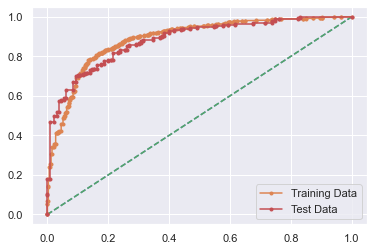

In [158]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the training data :")

# calculate AUC
LDAtrainauc = metrics.roc_auc_score(y_train,LDApred_class_train[:,1])
print('AUC for the Training Data: %.3f' % LDAtrainauc)

#  calculate roc curve
LDAtrainfpr, LDAtraintpr, LDAtrainthresholds = metrics.roc_curve(y_train,LDApred_class_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDAtrainfpr, LDAtraintpr, marker='.',label = 'Training Data')

print("\n")
print(color.BOLD+color.PURPLE+"AUC and ROC for the test data :")

# calculate AUC
LDAtestauc = metrics.roc_auc_score(y_test,LDApred_class_test[:,1])
print('AUC for the Test Data: %.3f' % LDAtestauc)

#  calculate roc curve
LDAtestfpr, LDAtesttpr, LDAtestthresholds = metrics.roc_curve(y_test,LDApred_class_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDAtestfpr, LDAtesttpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Observations

Precision and Accuracy of Logistic Regrression and LDA models is equal.
<br>Recall and F1 score of Logistic Regression is slighly better than LDA.

# 5. Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model

## Gaussian NB

In [159]:
print(color.BOLD+color.PURPLE+"Fitting Guassian NB model:")

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

Fitting Guassian NB model:


GaussianNB()

In [160]:
# Training Data Class Prediction with a cut-off value of 0.5
NBpred_class_train = NB_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
NBpred_class_test = NB_model.predict(X_test)


## Model Evaluation


Plotting confusion matrix for the different models for the Training and Testing Data:


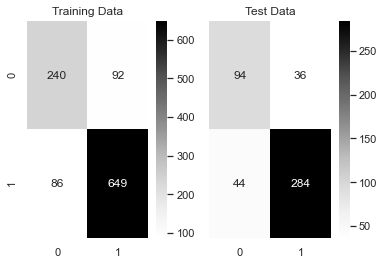

In [161]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

print(color.BOLD+color.PURPLE+"Plotting confusion matrix for the different models for the Training and Testing Data:")

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,NBpred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,NBpred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


<b>Evaluating model performance on the training data :</b>

In [162]:
NB_metric=metrics.classification_report(y_train,NBpred_class_train,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the training data:\n\n',metrics.classification_report(y_train,NBpred_class_train),'\n')
print("\n")
df=pd.DataFrame(LDA_metric).transpose()
NB_train_precision=round(df.loc["1"][0],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Gaussian NB Train data metrices:\n')
print ('Gaussian NB Regression Train Precision',NB_train_precision)
print ('Gaussian NB Regression Train Recall ',NB_train_recall)
print ('Gaussian NB Regression Train F1 score ',NB_train_f1)
#Train Data Accuracy
NB_train_acc=NB_model.score(X_train,y_train) 
print ('Gaussian NB Train Data Accuracy ',NB_train_acc)


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 



Gaussian NB Train data metrices:

Gaussian NB Regression Train Precision 0.87
Gaussian NB Regression Train Recall  0.88
Gaussian NB Regression Train F1 score  0.87
Gaussian NB Train Data Accuracy  0.8331771321462043


<b>Evaluating model performance on the test data :</b>


In [163]:
LDA_metric=metrics.classification_report(y_test,NBpred_class_test,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the testing data:\n\n',metrics.classification_report(y_test,NBpred_class_test),'\n')
print("\n")
df=pd.DataFrame(LDA_metric).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Gaussian NB Test data metrices:\n')
print ('Gaussian NB Regression Test Precision',NB_test_precision)
print ('Gaussian NB Regression Test Recall ',NB_test_recall)
print ('Gaussian NB Regression Test F1 score ',NB_test_f1)
#test Data Accuracy
NB_test_acc=NB_model.score(X_test,y_test) 
print ('Gaussian NB test Data Accuracy ',NB_test_acc)

Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 



Gaussian NB Test data metrices:

Gaussian NB Regression Test Precision 0.89
Gaussian NB Regression Test Recall  0.87
Gaussian NB Regression Test F1 score  0.88
Gaussian NB test Data Accuracy  0.8253275109170306


In [164]:
print(color.BOLD+color.PURPLE+"Training Data Probability Prediction:")
NBpred_class_train = NB_model.predict_proba(X_train)
print(pred_prob_train[:,1])
print("\n")
print(color.BOLD+color.PURPLE+"Test Data Probability Prediction:")
NBpred_class_test = NB_model.predict_proba(X_test)
print(pred_prob_test[:,1])

Training Data Probability Prediction:
[0.38509607 0.81252391 0.80983657 ... 0.76653923 0.93420808 0.59116289]


Test Data Probability Prediction:
[0.0679934  0.31161284 0.66637514 0.52357609 0.84048038 0.06338433
 0.99071502 0.98171605 0.85889401 0.95859458 0.90190537 0.63239326
 0.94569487 0.97222146 0.87968853 0.89764992 0.95598452 0.7588331
 0.95099133 0.83694771 0.88760589 0.20441759 0.71709858 0.93661642
 0.72330697 0.79897713 0.03906808 0.11697598 0.87924013 0.8631075
 0.85076357 0.37214311 0.46500363 0.94539141 0.43857071 0.60137762
 0.99329553 0.04719738 0.97762459 0.98845192 0.15124856 0.89365246
 0.35353076 0.29430921 0.3501496  0.97666739 0.85034417 0.97952318
 0.99136388 0.12104063 0.6487937  0.93007201 0.46903252 0.92609368
 0.0406047  0.89153099 0.90032622 0.92374651 0.7467943  0.94566217
 0.57997757 0.71080505 0.93538619 0.8183489  0.17232192 0.51241217
 0.91604106 0.94446026 0.9630885  0.98171605 0.98287379 0.08772645
 0.75458223 0.97449542 0.2662781  0.09458906 0.99324

In [165]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the training data :")


AUC and ROC for the training data :


AUC for the Training Data: 0.886


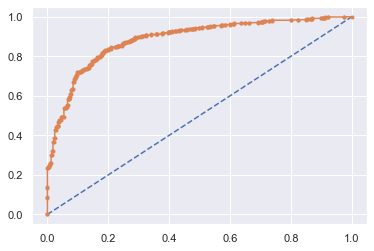

In [166]:
# calculate AUC
NBtrainauc = metrics.roc_auc_score(y_train,NBpred_class_train[:,1])
print('AUC for the Training Data: %.3f' % NBtrainauc)

#  calculate roc curve
NBtrainfpr, NBtraintpr, NBtrainthresholds = metrics.roc_curve(y_train,NBpred_class_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NBtrainfpr, NBtraintpr, marker='.',label = 'Training Data')


In [80]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the test data :")

AUC and ROC for the test data :


AUC for the Test Data: 0.885


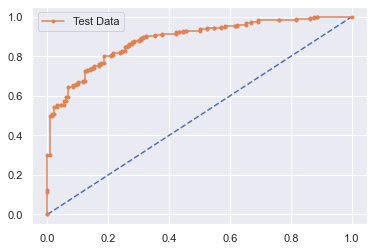

In [167]:
# calculate AUC
NBtestauc = metrics.roc_auc_score(y_test,NBpred_class_test[:,1])
print('AUC for the Test Data: %.3f' % NBtestauc)

#  calculate roc curve
NBtestfpr, NBtesttpr, NBtestthresholds = metrics.roc_curve(y_test,NBpred_class_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NBtestfpr, NBtesttpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## KNN

In [168]:
print(color.BOLD+color.PURPLE+"Fitting the KNN model to dataset:")

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

Fitting the KNN model to dataset:


KNeighborsClassifier()

In [169]:
# Training Data Class Prediction with a cut-off value of 0.5
KNNpred_class_train = KNN_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
KNNpred_class_test = KNN_model.predict(X_test)


Plotting confusion matrix for the different models for the Training and Testing Data:


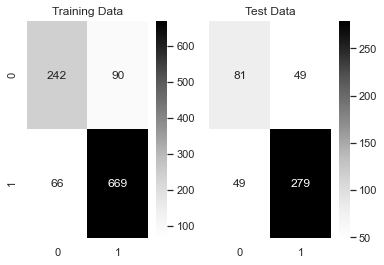

In [170]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

print(color.BOLD+color.PURPLE+"Plotting confusion matrix for the different models for the Training and Testing Data:")

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,KNNpred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,KNNpred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [171]:
KNN_metric=metrics.classification_report(y_train,KNNpred_class_train,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the training data:\n\n',metrics.classification_report(y_train,KNNpred_class_train),'\n')
print("\n")
df=pd.DataFrame(KNN_metric).transpose()
KNN_train_precision=round(df.loc["1"][0],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'KNN Train data metrices:\n')
print ('KNN Regression Train Precision',KNN_train_precision)
print ('KNN Regression Train Recall ',KNN_train_recall)
print ('KNN Regression Train F1 score ',KNN_train_f1)
#Train Data Accuracy
KNN_train_acc=KNN_model.score(X_train,y_train) 
print ('KNN Train Data Accuracy ',KNN_train_acc)


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067
 



KNN Train data metrices:

KNN Regression Train Precision 0.88
KNN Regression Train Recall  0.91
KNN Regression Train F1 score  0.9
KNN Train Data Accuracy  0.8537956888472352


In [172]:
KNN_metric=metrics.classification_report(y_test,KNNpred_class_test,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the testing data:\n\n',metrics.classification_report(y_test,KNNpred_class_test),'\n')
print("\n")
df=pd.DataFrame(KNN_metric).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'KNN Test data metrices:\n')
print ('KNN Regression Test Precision',KNN_test_precision)
print ('KNN Regression Test Recall ',KNN_test_recall)
print ('KNN Regression Test F1 score ',KNN_test_f1)
#test Data Accuracy
KNN_test_acc=KNN_model.score(X_test,y_test) 
print ('KNN test Data Accuracy ',KNN_test_acc)


Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458
 



KNN Test data metrices:

KNN Regression Test Precision 0.85
KNN Regression Test Recall  0.85
KNN Regression Test F1 score  0.85
KNN test Data Accuracy  0.7860262008733624


In [173]:
print(color.BOLD+color.PURPLE+"Training Data Probability Prediction:")
KNNpred_class_train = KNN_model.predict_proba(X_train)
print(pred_prob_train[:,1])
print("\n")
print(color.BOLD+color.PURPLE+"Test Data Probability Prediction:")
KNNpred_class_test = KNN_model.predict_proba(X_test)
print(pred_prob_test[:,1])


Training Data Probability Prediction:
[0.38509607 0.81252391 0.80983657 ... 0.76653923 0.93420808 0.59116289]


Test Data Probability Prediction:
[0.0679934  0.31161284 0.66637514 0.52357609 0.84048038 0.06338433
 0.99071502 0.98171605 0.85889401 0.95859458 0.90190537 0.63239326
 0.94569487 0.97222146 0.87968853 0.89764992 0.95598452 0.7588331
 0.95099133 0.83694771 0.88760589 0.20441759 0.71709858 0.93661642
 0.72330697 0.79897713 0.03906808 0.11697598 0.87924013 0.8631075
 0.85076357 0.37214311 0.46500363 0.94539141 0.43857071 0.60137762
 0.99329553 0.04719738 0.97762459 0.98845192 0.15124856 0.89365246
 0.35353076 0.29430921 0.3501496  0.97666739 0.85034417 0.97952318
 0.99136388 0.12104063 0.6487937  0.93007201 0.46903252 0.92609368
 0.0406047  0.89153099 0.90032622 0.92374651 0.7467943  0.94566217
 0.57997757 0.71080505 0.93538619 0.8183489  0.17232192 0.51241217
 0.91604106 0.94446026 0.9630885  0.98171605 0.98287379 0.08772645
 0.75458223 0.97449542 0.2662781  0.09458906 0.99324

AUC and ROC for the training data :
AUC for the Training Data: 0.921


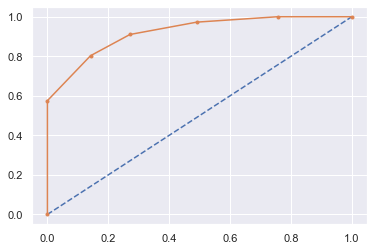

In [174]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the training data :")

# calculate AUC
KNNtrainauc = metrics.roc_auc_score(y_train,KNNpred_class_train[:,1])
print('AUC for the Training Data: %.3f' % KNNtrainauc)

#  calculate roc curve
KNNtrainfpr, KNNtraintpr, KNNtrainthresholds = metrics.roc_curve(y_train,KNNpred_class_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNNtrainfpr, KNNtraintpr, marker='.',label = 'Training Data')




AUC and ROC for the test data :
AUC for the Test Data: 0.835


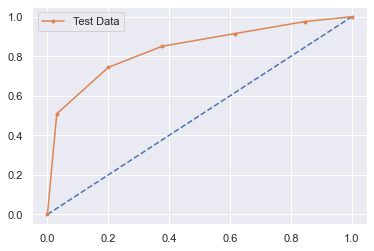

In [175]:
print("\n")
print(color.BOLD+color.PURPLE+"AUC and ROC for the test data :")

# calculate AUC
KNNtestauc = metrics.roc_auc_score(y_test,KNNpred_class_test[:,1])
print('AUC for the Test Data: %.3f' % KNNtestauc)

#  calculate roc curve
KNNtestfpr, KNNtesttpr, KNNtestthresholds = metrics.roc_curve(y_test,KNNpred_class_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNNtestfpr, KNNtesttpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Observations


Accuracy of Gaussian NB is better than KNN, but Precision, Recall and F1 of KNN is better than Gaussian NB.

# 6. Model Tuning , Bagging ( 2.5 pts) and Boosting

## Bagging

In [176]:
print(color.BOLD+color.PURPLE+"Fitting Bagging with Regression to dataset:")

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

Fitting Bagging with Regression to dataset:


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [177]:
# Training Data Class Prediction with a cut-off value of 0.5
Baggingpred_class_train = Bagging_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
Baggingpred_class_test = Bagging_model.predict(X_test)


Plotting confusion matrix for the different models for the Training and Testing Data:


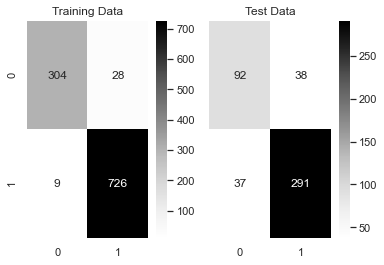

In [178]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

print(color.BOLD+color.PURPLE+"Plotting confusion matrix for the different models for the Training and Testing Data:")

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,Baggingpred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,Baggingpred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


## Model Evaluation


<b>Evaluating model performance on the training data :</b>

In [179]:
Bagging_metric=metrics.classification_report(y_train,Baggingpred_class_train,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the training data:\n\n',metrics.classification_report(y_train,Baggingpred_class_train),'\n')
print("\n")
df=pd.DataFrame(Bagging_metric).transpose()
Bagging_train_precision=round(df.loc["1"][0],2)
Bagging_train_recall=round(df.loc["1"][1],2)
Bagging_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Bagging Train data metrices:\n')
print ('Bagging Regression Train Precision',Bagging_train_precision)
print ('Bagging Regression Train Recall ',Bagging_train_recall)
print ('Bagging Regression Train F1 score ',Bagging_train_f1)
#Train Data Accuracy
Bagging_train_acc=Bagging_model.score(X_train,y_train) 
print ('Bagging Train Data Accuracy ',Bagging_train_acc)


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067
 



Bagging Train data metrices:

Bagging Regression Train Precision 0.96
Bagging Regression Train Recall  0.99
Bagging Regression Train F1 score  0.98
Bagging Train Data Accuracy  0.9653233364573571


<b>Evaluating model performance on the testing data :</b>


In [180]:
Bagging_metric=metrics.classification_report(y_test,Baggingpred_class_test,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the testing data:\n\n',metrics.classification_report(y_test,Baggingpred_class_test),'\n')
print("\n")
df=pd.DataFrame(Bagging_metric).transpose()
Bagging_test_precision=round(df.loc["1"][0],2)
Bagging_test_recall=round(df.loc["1"][1],2)
Bagging_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'KNN Test data metrices:\n')
print ('Bagging Regression Test Precision',Bagging_test_precision)
print ('Bagging Regression Test Recall ',Bagging_test_recall)
print ('Bagging Regression Test F1 score ',Bagging_test_f1)
#test Data Accuracy
Bagging_test_acc=Bagging_model.score(X_test,y_test) 
print ('Bagging test Data Accuracy ',Bagging_test_acc)


Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458
 



KNN Test data metrices:

Bagging Regression Test Precision 0.88
Bagging Regression Test Recall  0.89
Bagging Regression Test F1 score  0.89
Bagging test Data Accuracy  0.8362445414847162


In [181]:
print(color.BOLD+color.PURPLE+"Training Data Probability Prediction:")
Baggingpred_class_train = Bagging_model.predict_proba(X_train)
print(pred_prob_train[:,1])
print("\n")
print(color.BOLD+color.PURPLE+"Test Data Probability Prediction:")
Baggingpred_class_test = Bagging_model.predict_proba(X_test)
print(pred_prob_test[:,1])


Training Data Probability Prediction:
[0.38509607 0.81252391 0.80983657 ... 0.76653923 0.93420808 0.59116289]


Test Data Probability Prediction:
[0.0679934  0.31161284 0.66637514 0.52357609 0.84048038 0.06338433
 0.99071502 0.98171605 0.85889401 0.95859458 0.90190537 0.63239326
 0.94569487 0.97222146 0.87968853 0.89764992 0.95598452 0.7588331
 0.95099133 0.83694771 0.88760589 0.20441759 0.71709858 0.93661642
 0.72330697 0.79897713 0.03906808 0.11697598 0.87924013 0.8631075
 0.85076357 0.37214311 0.46500363 0.94539141 0.43857071 0.60137762
 0.99329553 0.04719738 0.97762459 0.98845192 0.15124856 0.89365246
 0.35353076 0.29430921 0.3501496  0.97666739 0.85034417 0.97952318
 0.99136388 0.12104063 0.6487937  0.93007201 0.46903252 0.92609368
 0.0406047  0.89153099 0.90032622 0.92374651 0.7467943  0.94566217
 0.57997757 0.71080505 0.93538619 0.8183489  0.17232192 0.51241217
 0.91604106 0.94446026 0.9630885  0.98171605 0.98287379 0.08772645
 0.75458223 0.97449542 0.2662781  0.09458906 0.99324

AUC and ROC for the training data :
AUC for the Training Data: 0.997


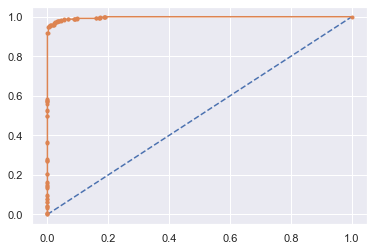

In [182]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the training data :")

# calculate AUC
Baggingtrainauc = metrics.roc_auc_score(y_train,Baggingpred_class_train[:,1])
print('AUC for the Training Data: %.3f' % Baggingtrainauc)

#  calculate roc curve
Baggingtrainfpr, Baggingtraintpr, Baggingtrainthresholds = metrics.roc_curve(y_train,Baggingpred_class_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Baggingtrainfpr, Baggingtraintpr, marker='.',label = 'Training Data')


AUC and ROC for the test data :
AUC for the Test Data: 0.897


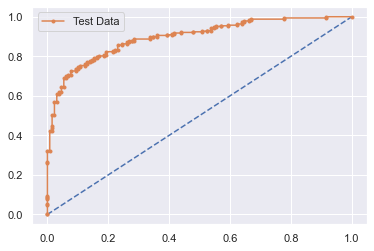

In [183]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the test data :")

# calculate AUC
Baggingtestauc = metrics.roc_auc_score(y_test,Baggingpred_class_test[:,1])
print('AUC for the Test Data: %.3f' % Baggingtestauc)

#  calculate roc curve
Baggingtestfpr, Baggingtesttpr, Baggingtestthresholds = metrics.roc_curve(y_test,Baggingpred_class_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Baggingtestfpr, Baggingtesttpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Ada Boost

In [184]:
print(color.BOLD+color.PURPLE+"Fitting ADA Boosting model to dataset:")

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

Fitting ADA Boosting model to dataset:


AdaBoostClassifier(n_estimators=100, random_state=1)

In [185]:
# Training Data Class Prediction with a cut-off value of 0.5
AdaBoost_class_train = LDAmodel.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
AdaBoost_class_test = LDAmodel.predict(X_test)


Plotting confusion matrix for the different models for the Training Data:


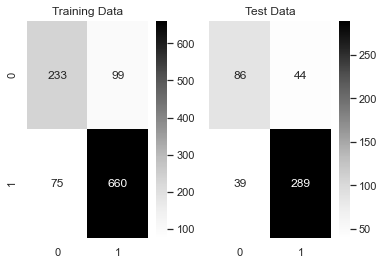

In [186]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

print(color.BOLD+color.PURPLE+"Plotting confusion matrix for the different models for the Training Data:")

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,AdaBoost_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,AdaBoost_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


## Model Evaluation


<b>Evaluating model performance on the training data :</b>

In [187]:
AdaBoost_metric=metrics.classification_report(y_train,AdaBoost_class_train,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the training data:\n\n',metrics.classification_report(y_train,AdaBoost_class_train),'\n')
print("\n")
df=pd.DataFrame(KNN_metric).transpose()
AdaBoost_train_precision=round(df.loc["1"][0],2)
AdaBoost_train_recall=round(df.loc["1"][1],2)
AdaBoost_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'ADABoost Train data metrices:\n')
print ('ADABoost Regression Train Precision',AdaBoost_train_precision)
print ('ADABoost Regression Train Recall ',AdaBoost_train_recall)
print ('ADABoost Regression Train F1 score ',AdaBoost_train_f1)
#Train Data Accuracy
AdaBoost_train_acc=ADB_model.score(X_train,y_train) 
print ('ADABoost Train Data Accuracy ',AdaBoost_train_acc)


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067
 



ADABoost Train data metrices:

ADABoost Regression Train Precision 0.85
ADABoost Regression Train Recall  0.85
ADABoost Regression Train F1 score  0.85
ADABoost Train Data Accuracy  0.8472352389878163


<b>Evaluating model performance on the testing data :</b>

In [188]:
AdaBoost_metric=metrics.classification_report(y_test,AdaBoost_class_test,output_dict=True)

print(color.BOLD+color.PURPLE+'Classification Report of the testing data:\n\n',metrics.classification_report(y_test,AdaBoost_class_test),'\n')
print("\n")
df=pd.DataFrame(AdaBoost_metric).transpose()
AdaBoost_test_precision=round(df.loc["1"][0],2)
AdaBoost_test_recall=round(df.loc["1"][1],2)
AdaBoost_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'ADABoost Test data metrices:\n')
print ('ADABoost Regression Test Precision',AdaBoost_test_precision)
print ('ADABoost Regression Test Recall ',AdaBoost_test_recall)
print ('ADABoost Regression Test F1 score ',AdaBoost_test_f1)
#test Data Accuracy
AdaBoost_test_acc=ADB_model.score(X_test,y_test) 
print ('ADABoost test Data Accuracy ',AdaBoost_test_acc)


Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458
 



ADABoost Test data metrices:

ADABoost Regression Test Precision 0.87
ADABoost Regression Test Recall  0.88
ADABoost Regression Test F1 score  0.87
ADABoost test Data Accuracy  0.8187772925764192


In [189]:
print(color.BOLD+color.PURPLE+"Training Data Probability Prediction:")
AdaBoost_pred_class_train = ADB_model.predict_proba(X_train)
print(pred_prob_train[:,1])
print("\n")
print(color.BOLD+color.PURPLE+"Test Data Probability Prediction:")
AdaBoost_pred_class_test = ADB_model.predict_proba(X_test)
print(pred_prob_test[:,1])


Training Data Probability Prediction:
[0.38509607 0.81252391 0.80983657 ... 0.76653923 0.93420808 0.59116289]


Test Data Probability Prediction:
[0.0679934  0.31161284 0.66637514 0.52357609 0.84048038 0.06338433
 0.99071502 0.98171605 0.85889401 0.95859458 0.90190537 0.63239326
 0.94569487 0.97222146 0.87968853 0.89764992 0.95598452 0.7588331
 0.95099133 0.83694771 0.88760589 0.20441759 0.71709858 0.93661642
 0.72330697 0.79897713 0.03906808 0.11697598 0.87924013 0.8631075
 0.85076357 0.37214311 0.46500363 0.94539141 0.43857071 0.60137762
 0.99329553 0.04719738 0.97762459 0.98845192 0.15124856 0.89365246
 0.35353076 0.29430921 0.3501496  0.97666739 0.85034417 0.97952318
 0.99136388 0.12104063 0.6487937  0.93007201 0.46903252 0.92609368
 0.0406047  0.89153099 0.90032622 0.92374651 0.7467943  0.94566217
 0.57997757 0.71080505 0.93538619 0.8183489  0.17232192 0.51241217
 0.91604106 0.94446026 0.9630885  0.98171605 0.98287379 0.08772645
 0.75458223 0.97449542 0.2662781  0.09458906 0.99324

AUC and ROC for the training data :
AUC for the Training Data: 0.913


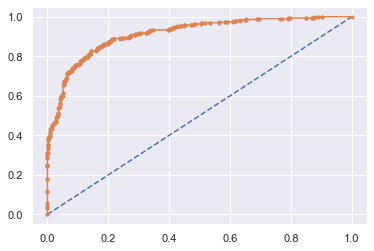

In [190]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the training data :")

# calculate AUC
AddBoosttrainauc = metrics.roc_auc_score(y_train,AdaBoost_pred_class_train[:,1])
print('AUC for the Training Data: %.3f' % AddBoosttrainauc)

#  calculate roc curve
AddBoosttrainfpr, AddBoosttraintpr, AddBoosttrainthresholds = metrics.roc_curve(y_train,AdaBoost_pred_class_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AddBoosttrainfpr, AddBoosttraintpr, marker='.',label = 'Training Data')


AUC and ROC for the test data :
AUC for the Test Data: 0.879


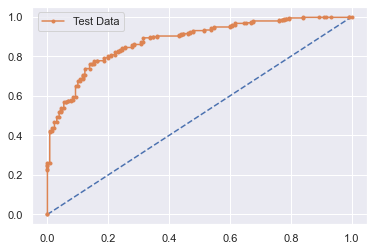

In [191]:
print(color.BOLD+color.PURPLE+"AUC and ROC for the test data :")

# calculate AUC
AddBoosttestauc = metrics.roc_auc_score(y_test,AdaBoost_pred_class_test[:,1])
print('AUC for the Test Data: %.3f' % AddBoosttestauc)

#  calculate roc curve
AddBoosttestfpr, AddBoosttesttpr, AddBoosttestthresholds = metrics.roc_curve(y_test,AdaBoost_pred_class_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AddBoosttestfpr, AddBoosttesttpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Observations


Precision, Recall and F1 of Bagging is better than Gaussian Ada Boost Model.
<br>Although, Accuracy of Bagging seems better than AdaBoost. There is a large gap of about 13% between accuracy levels of training and testing data of Bagging model.
While, there is a mininmum gap of 3% between accuracy levels of training and testing data of AdaBoost model.

# 7. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.

<h2>Metric represing comparision of all models</h2>

In [197]:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[Log_train_acc,Log_train_auc,Log_train_recall,Log_train_precision,Log_train_f1],
        'Logistic Regression Test':[Log_test_acc,Log_test_auc,Log_test_recall,Log_test_precision,Log_test_f1],
       'LDA Train':[LDA_train_acc,LDAtrainauc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDAtestauc,LDA_test_recall,LDA_test_precision,LDA_test_f1],

        'GuassianNB Train':[NB_train_acc,NBtrainauc,NB_train_recall,NB_train_precision,NB_train_f1],
        'GuassianNB Test':[NB_test_acc,NBtestauc,NB_test_recall,NB_test_precision,NB_test_f1],
        
        'KNN Train':[KNN_train_acc,KNNtrainauc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_acc,KNNtestauc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                     
        'RFBagging Train':[Bagging_train_acc,Baggingtrainauc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
        'RFBagging Test':[Bagging_test_acc,Baggingtestauc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                  
        'AdaBoost Train':[AdaBoost_train_acc,AddBoosttrainauc,AdaBoost_train_recall,AdaBoost_train_precision,AdaBoost_train_f1],
        'AdaBoost Test':[AdaBoost_test_acc,AddBoosttestauc,AdaBoost_test_recall,AdaBoost_test_precision,AdaBoost_test_f1],
        
                     
},index=index)
round(data,2)

Logistic Regression Train  Logistic Regression Test  LDA Train  \
Accuracy   0.84                       0.82                      0.84        
AUC        0.89                       0.88                      0.89        
Recall     0.91                       0.89                      0.90        
Precision  0.87                       0.87                      0.87        
F1 Score   0.89                       0.88                      0.88        

           LDA Test  GuassianNB Train  GuassianNB Test  KNN Train  KNN Test  \
Accuracy   0.82      0.83              0.83             0.85       0.79       
AUC        0.88      0.89              0.88             0.92       0.84       
Recall     0.88      0.88              0.87             0.91       0.85       
Precision  0.87      0.87              0.89             0.88       0.85       
F1 Score   0.87      0.87              0.88             0.90       0.85       

           RFBagging Train  RFBagging Test  AdaBoost Train  AdaBoost Test  
Accuracy   0.97             0.84            0.85            0.82           
AUC        1.00             0.90            0.91            0.88           
Recall     0.99             0.89            0.85            0.88           
Precision  0.96             0.88            0.85            0.87           
F1 Score   0.98             0.89            0.85            0.87

<h2> ROC curve on training data for all models:</h2>

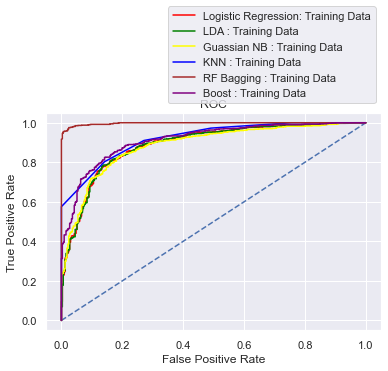

In [193]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logtrainfpr, logtraintpr,color='red',label="Logistic Regression: Training Data")
plt.plot(LDAtrainfpr,LDAtraintpr,color='green',label="LDA : Training Data")
plt.plot(NBtrainfpr,NBtraintpr,color='yellow',label="Guassian NB : Training Data")
plt.plot(KNNtrainfpr,KNNtraintpr,color='blue',label="KNN : Training Data")
plt.plot(Baggingtrainfpr,Baggingtraintpr,color='brown',label="RF Bagging : Training Data")
plt.plot(AddBoosttrainfpr,AddBoosttraintpr,color='purple',label="Boost : Training Data")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


<h2> ROC curve on testing data for all models:</h2>

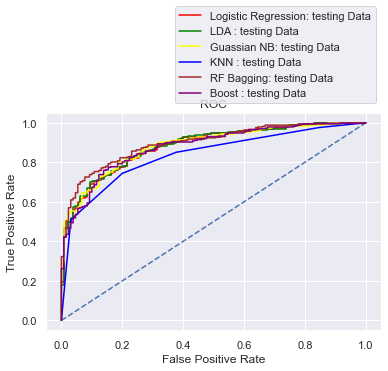

In [194]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logtestfpr, logtesttpr,color='red',label="Logistic Regression: testing Data")
plt.plot(LDAtestfpr,LDAtesttpr,color='green',label="LDA : testing Data")
plt.plot(NBtestfpr, NBtesttpr,color='yellow',label="Guassian NB: testing Data")
plt.plot(KNNtestfpr,KNNtesttpr,color='blue',label="KNN : testing Data")
plt.plot(Baggingtestfpr, Baggingtesttpr,color='brown',label="RF Bagging: testing Data")
plt.plot(AddBoosttestfpr, AddBoosttesttpr,color='purple',label="Boost : testing Data")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

 # Conclusion
 
Random Forest with Bagging is the best optimized model for this data set in terms of accuracy, precision , recall , F1 score.
<br>After Random Forest with Bagging, Logistic Regression and LDA model provide better Recall folowed by Gaussian NB, KNN and AdaBoost.   
<br>After Random Forest with Bagging, KNN and Gaussina provide better precision folowed by Logistic Regression, LDA and AdaBoost.
<br>After Random Forest with Bagging, KNN and Gaussina provide better F1 score folowed by Logistic Regression, LDA and AdaBoost.


# 8. Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

## Business Insights

<br>1. People of all age groups tend to vote for conservative and labour party, while people of age group > 50 have voted only to conservative party.
<br>2. People with national economic condition & hosehold economic condition >2.8, voted only for Labour Party.
<br>3. People with ‘Eurosceptic’ sentiment higher than 5.5, tend to vote for conservative party
<br>4. People with political knowledge higher than 1.75 , also tend to vote for conservative party
 

<b> Problem Statement 02 :</b>In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [202]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [203]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural


[nltk_data] Error loading inaugural: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>



***
<h1><div style="text-align: Left">Analysis and Solutions</div></h1>


# 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [205]:
Speech_Roosevel=inaugural.raw('1941-Roosevelt.txt')
Speech_Kennedy=inaugural.raw('1961-Kennedy.txt')
Speech_Nixon=inaugural.raw('1973-Nixon.txt')


In [206]:
President_Name=['President Roosevelt','President Kennedy','President Nixon']
Rnum_chars = len(inaugural.raw('1941-Roosevelt.txt')) 
Rnum_words = len(inaugural.words('1941-Roosevelt.txt'))
Rnum_sents = len(inaugural.sents('1941-Roosevelt.txt'))
Roosevelt=[Rnum_chars,Rnum_words,Rnum_sents]

Knum_chars = len(inaugural.raw('1961-Kennedy.txt')) 
Knum_words = len(inaugural.words('1961-Kennedy.txt'))
Knum_sents = len(inaugural.sents('1961-Kennedy.txt'))
Kennedy=[Knum_chars,Knum_words,Knum_sents]

Nnum_chars = len(inaugural.raw('1973-Nixon.txt')) 
Nnum_words = len(inaugural.words('1973-Nixon.txt'))
Nnum_sents = len(inaugural.sents('1973-Nixon.txt'))
Nixon=[Nnum_chars,Nnum_words,Nnum_sents]

data=[['President Roosevelt',Rnum_chars,Rnum_words,Rnum_sents],
      ['President Kennedy',Knum_chars,Knum_words,Knum_sents],
      ['President Nixon',Nnum_chars,Nnum_words,Nnum_sents]]

Speech=pd.DataFrame(data,columns=['President Name','Count_Characters','Count_Words','Count_Sentences'])
Speech

President Name  Count_Characters  Count_Words  Count_Sentences
0  President Roosevelt  7571              1536         68             
1  President Kennedy    7618              1546         52             
2  President Nixon      9991              2028         69

***
## 2.2) Remove all the stopwords from the three speeches.

In [208]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
languages=stopwords.fileids()
print(color.BOLD+color.PURPLE+"List of all Languages:\n")
print(languages)

List of all Languages:

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [209]:
globalstopwords=[]  
for language in languages :
    stop = stopwords.words(language)
    globalstopwords.append(stop)

In [210]:

stoplist = [] 
  
# function used for removing nested  
# lists in python.  
def reemovNestings(globalstopwords): 
    for i in globalstopwords: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            stoplist.append(i) 


In [213]:
  reemovNestings(globalstopwords) 
print (color.BOLD+color.PURPLE+'List of all stop words:\n ', stoplist) 

List of all stop words:
  ['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم'

In [214]:
Speeches=[['Roosevel',Speech_Roosevel],['Kennedy',Speech_Kennedy],['Nixon',Speech_Nixon]]

In [217]:
President=[]
Pre_WordCount=[]
Post_WordCount=[]
Percentage=[]
speechlist=[]

for speech in Speeches :
    speech_str = ' '.join([str(elem) for elem in speech])
    text_tokens = word_tokenize(speech_str.lower())
    
    #table = str.maketrans('', '', string.punctuation)
    #stripped = [w.translate(table) for w in text_tokens]
    
    
    tokens_without_sw = [word for word in text_tokens if not word in stoplist and word.isalnum()]
    print(color.BOLD+color.PURPLE+"Speech of President",speech_str.partition(' ')[0],"post removing stop words:\n")
    print(tokens_without_sw)
    print("-------------------------------------------------------------------")
    print("\n")
    President.append(speech_str.partition(' ')[0])
    Pre_WordCount.append(len(text_tokens))
    Post_WordCount.append(len(tokens_without_sw))
    Percentage.append(len(tokens_without_sw) / len(text_tokens) * 100)
    speechlist.append(tokens_without_sw)

Speech of President Roosevel post removing stop words:

['roosevel', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'doubt', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', '

Speech of President Nixon post removing stop words:

['nixon', 'vice', 'president', 'speaker', 'chief', 'justice', 'senator', 'cook', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'peace', 'world', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able', 'establish', 'base'

In [218]:

index=['President Name','Word count in original Speech','Word count post removing stop words','Percentage of stop words removed']
data = pd.DataFrame({'President Name':President,
       'Word count in original Speech':Pre_WordCount,
       'Word count post removing stop words':Post_WordCount,
       'Percentage of stop words removed' :Percentage})
data

President Name  Word count in original Speech  \
0  Roosevel       1527                            
1  Kennedy        1544                            
2  Nixon          2007                            

   Word count post removing stop words  Percentage of stop words removed  
0  608                                  39.816634                         
1  670                                  43.393782                         
2  799                                  39.810663

***
## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [220]:
for sp_fr in speechlist :
    freq=nltk.FreqDist(sp_fr)    
    print(color.BOLD+color.PURPLE+"For",sp_fr[0],"'s speech, most common word is",freq.most_common(1))
   

For roosevel 's speech, most common word is [('nation', 12)]
For kennedy 's speech, most common word is [('let', 16)]
For nixon 's speech, most common word is [('us', 26)]


***
## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [221]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [223]:
print(color.BOLD+color.PURPLE+'Word Cloud for President Roosevel Speech:\n')
Roosevel_wc  = ' '.join([str(elem) for elem in speechlist[0]])
l1=len(Roosevel_wc)
maskArray = np.array(Image.open("loc.png"))
wordcloud = WordCloud(background_color = "white", max_words = l1, mask = maskArray,width=1800, height=1400).generate(Roosevel_wc)

plt.figure( figsize=(120,110), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Word Cloud for President Roosevel Speech:



In [224]:
print(color.BOLD+color.PURPLE+'Word Cloud for President Kennedy Speech:\n')

Kennedy_wc  = ' '.join([str(elem) for elem in speechlist[1]])
l2=len(Kennedy_wc)
wordcloud = WordCloud(background_color = "white", max_words = l2, width=1800, height=1400).generate(Kennedy_wc)

plt.figure( figsize=(120,110), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Word Cloud for President Kennedy Speech:



In [225]:
print(color.BOLD+color.PURPLE+'Word Cloud for President Nixon Speech:\n')

Nixon_wc  = ' '.join([str(elem) for elem in speechlist[1]])
l3=len(Nixon_wc)
maskArray = np.array(Image.open("user.png"))
wordcloud = WordCloud(background_color = "white",max_words = l3, mask = maskArray,width=2000, height=2000).generate(Nixon_wc)

plt.figure( figsize=(220,210), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Word Cloud for President Nixon Speech:



# Project Report Ends